In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 19 21:30:00 2023

@author: Ugochukwu O. Ugwu
"""
__email__ = "uugobinnah@gmail.com"

#!/usr/bin/tufts_env python
"""
--------------------------------------------------------------------------
Created November 20, 2023 for GESP-Py library
"""

%reset
from gsvp_py.solvers.gsvp import *
from gsvp_py.solvers.Qplot_feat_jacc_acc import *
from gsvp_py.solvers.features import *
from gsvp_py.solvers.classifiers import classification, test_model
from gsvp_py.solvers.features import top_features


Nothing done.


Generate Data: Running "generators" takes datasets stored in a folder, generates training, validation, and test data, and stores them in a specified folder

In [2]:
from gsvp_py.solvers.Storing_data import generators
generators()

Note that 'npsvm' uses all the sparse weights while 'truncate' uses the sparse weights truncated at a suitably defined elbow point.  For the "truncate_npsvm", the top features is union of features selected by both weights for some truncation indices. We remark that unless otherwise stated, all classification results will utilize the elbow point of each weights determined by each solution methods. Entries of the weight vectors below the elbow points are set to zero. We experiment with q = 0.1 and q = 1 for both cases. 

Here, we examine the sensitivity of the solutions to $\epsilon$, and $q$, and illustrate with the Ovarian Cancer data that smaller values of q often result in sparser solutions, and by extension smaller number of features. A Jaccard Similarity Index (SMI) of about 0.3849066717072391 shows that different $q$ can be expoited to select different features. Moreover, Larger values of $q$ result in less sparser solutions.

In [ ]:
lambd = [(0.0001, 0.0002)]
step_size = [0.03162277660168379] 
datum = ['Ovarian Cancer Dataset']
setq = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
headings = 'Ovarian'
Lqplots(setq,'$\ell_q$-PGD-GSVPSVM',lambd[0],42,datum[0],'lq1','truncate',headings,10**(-1.5),step_size[0],'npca',**{'x':'Normal','y':'Cancer'})

MODEL EVALUATION:

Here, the trained and validated model is tested on a sequestered dataset. The reqularization parameters $\delta_1$ and $\delta_2$ are chosen via a grid search over the intervals $[0.0001,1]$ and $[0.0002,1]$, respectively. The step size $\alpha$ is selected from $\beta$*$[10^{-1},10^{-1.5},10^{-2},10^{-2.5},10^{-3},10^{-3.5}]$. The best parameters are expected to result in sparse solutions, ideally, with decreasing objective function values, and non-oscillating relative function error. Starting with the $\ell_q$-PGD-GSVPSVM.

Validation Results for q = 0.1
condition satisfied
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      3       0  Breast Cancer   0.965872     0.984375  0.947368   0.972973   

   TN  FP  FN  TP  
0  63   1   2  36  


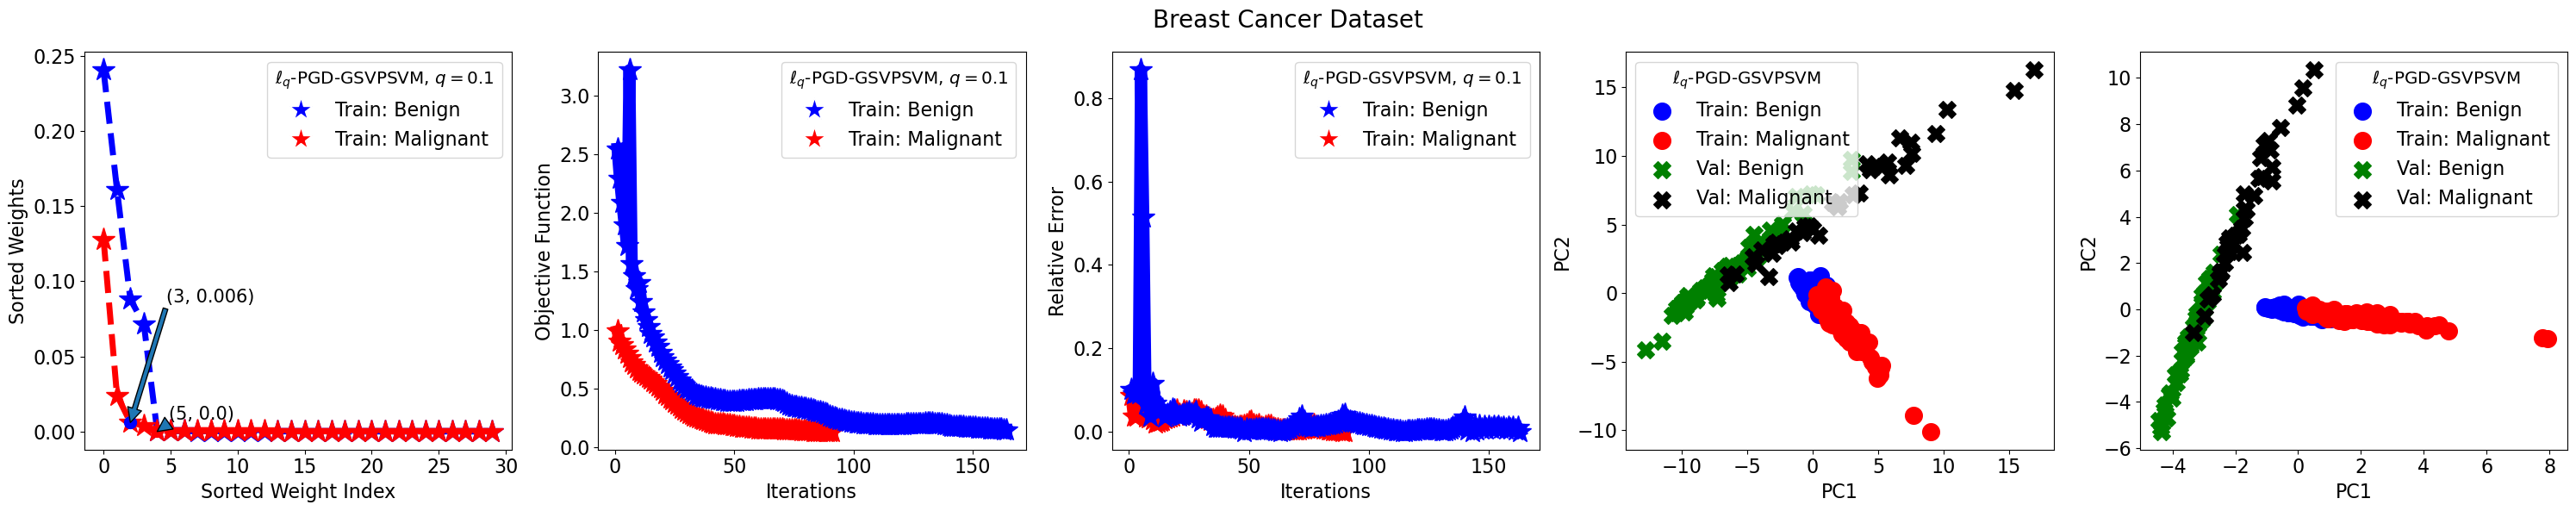

,Feature Index (Benign),Top Features (Benign),Feature Index (Malignant),Top Features (Malignant)
0,12,perimeter_se,27,concave points_worst
1,7,concave points_mean,9,fractal_dimension_mean
2,2,perimeter_mean,21,texture_worst
3,3,area_mean,,
4,17,concave points_se,,


Test Results for q = 0.1
         Dataset  Bal. Acc.  Specificity    Recall  Precision  TN  FP  FN  TP
0  Breast Cancer   0.950175     0.977273  0.923077       0.96  43   1   2  24
Validation Results for q = 1
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      3       0  Breast Cancer   0.986842          1.0  0.973684        1.0   

   TN  FP  FN  TP  
0  64   0   1  37  


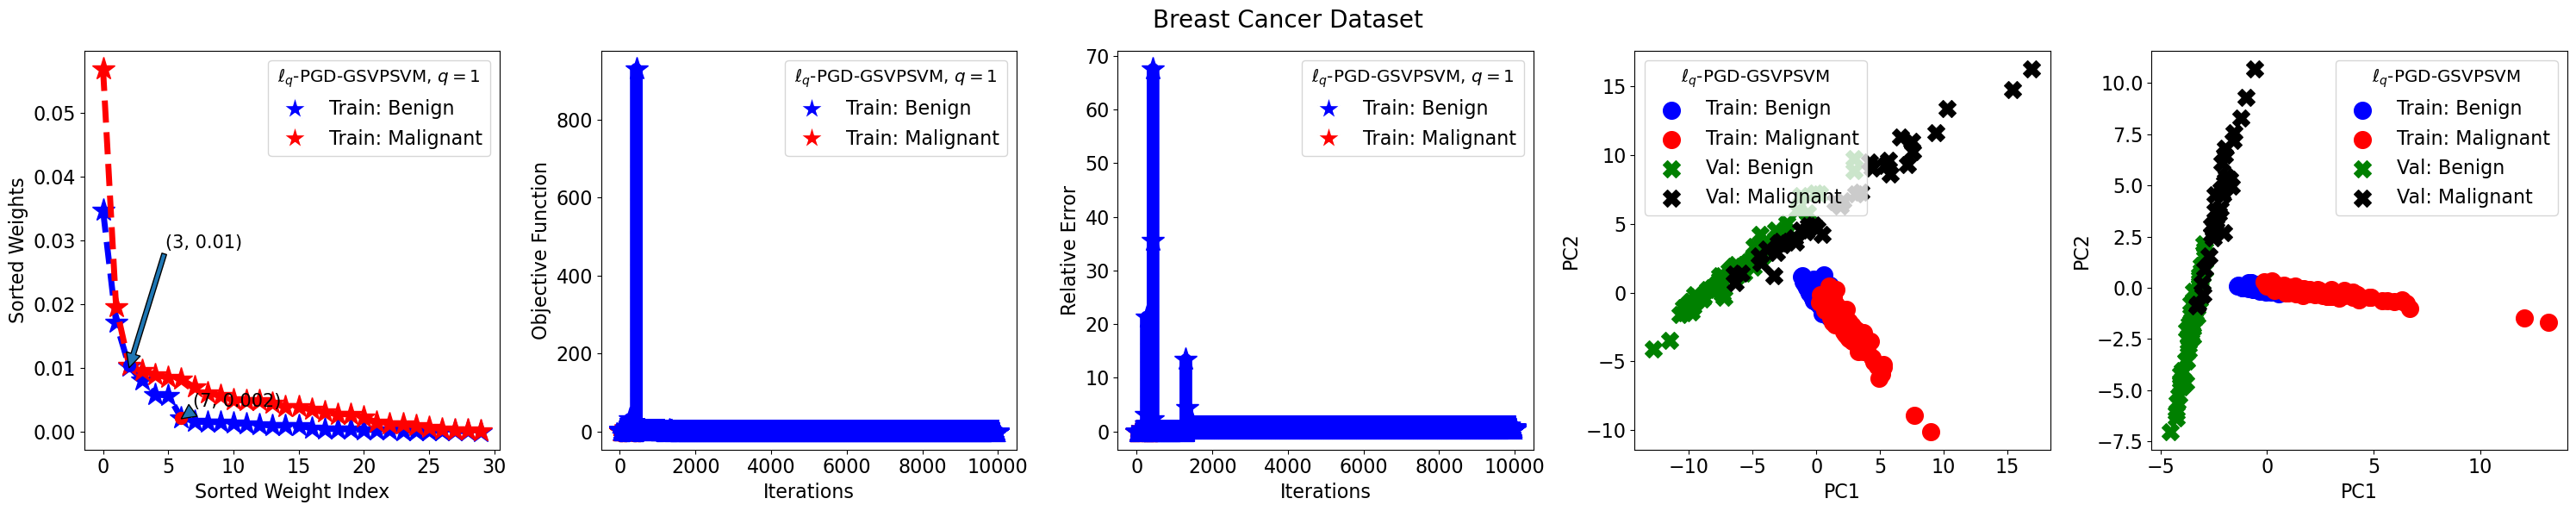

,Feature Index (Benign),Top Features (Benign),Feature Index (Malignant),Top Features (Malignant)
0,12,perimeter_se,27,concave points_worst
1,7,concave points_mean,21,texture_worst
2,17,concave points_se,0,radius_mean
3,13,area_se,,
4,23,area_worst,,
5,3,area_mean,,
6,24,smoothness_worst,,


Test Results for q = 1
         Dataset  Bal. Acc.  Specificity    Recall  Precision  TN  FP  FN  TP
0  Breast Cancer   0.950175     0.977273  0.923077       0.96  43   1   2  24


In [2]:
lambd = [(0.02, 0.02),(0.3, 0.4)]
step_size = [0.025,0.003]
datum = ['Breast Cancer Dataset']
datra= ['Breast Cancer']
datum_list = ['breast_cancer']
listing = [{'x':'Benign','y':'Malignant'}]
q = [0.1,1]
for k in range(len(q)):
    for i in range(len(datum)):
        print(f'Validation Results for q = {q[k]}')
        runs_list, _, _ = classification(datum[i], '$\ell_q$-PGD-GSVPSVM', 'truncate', 'lq1', lambd[k], 42, step_size[k], 'pca',**{'q': q[k], 'epsa': 10**(-3)})
        try:
            top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
        except FileNotFoundError:
            continue
    print(f'Test Results for q = {q[k]}')
    datra = ['Breast Cancer']
    test_model(datum, datum_list, datra)

Validation Results for q = 0.1
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity  Recall  Precision  \
0      2       1  Ovarian Cancer        1.0          1.0     1.0        1.0   

   TN  FP  FN  TP  
0  19   0   0  34  


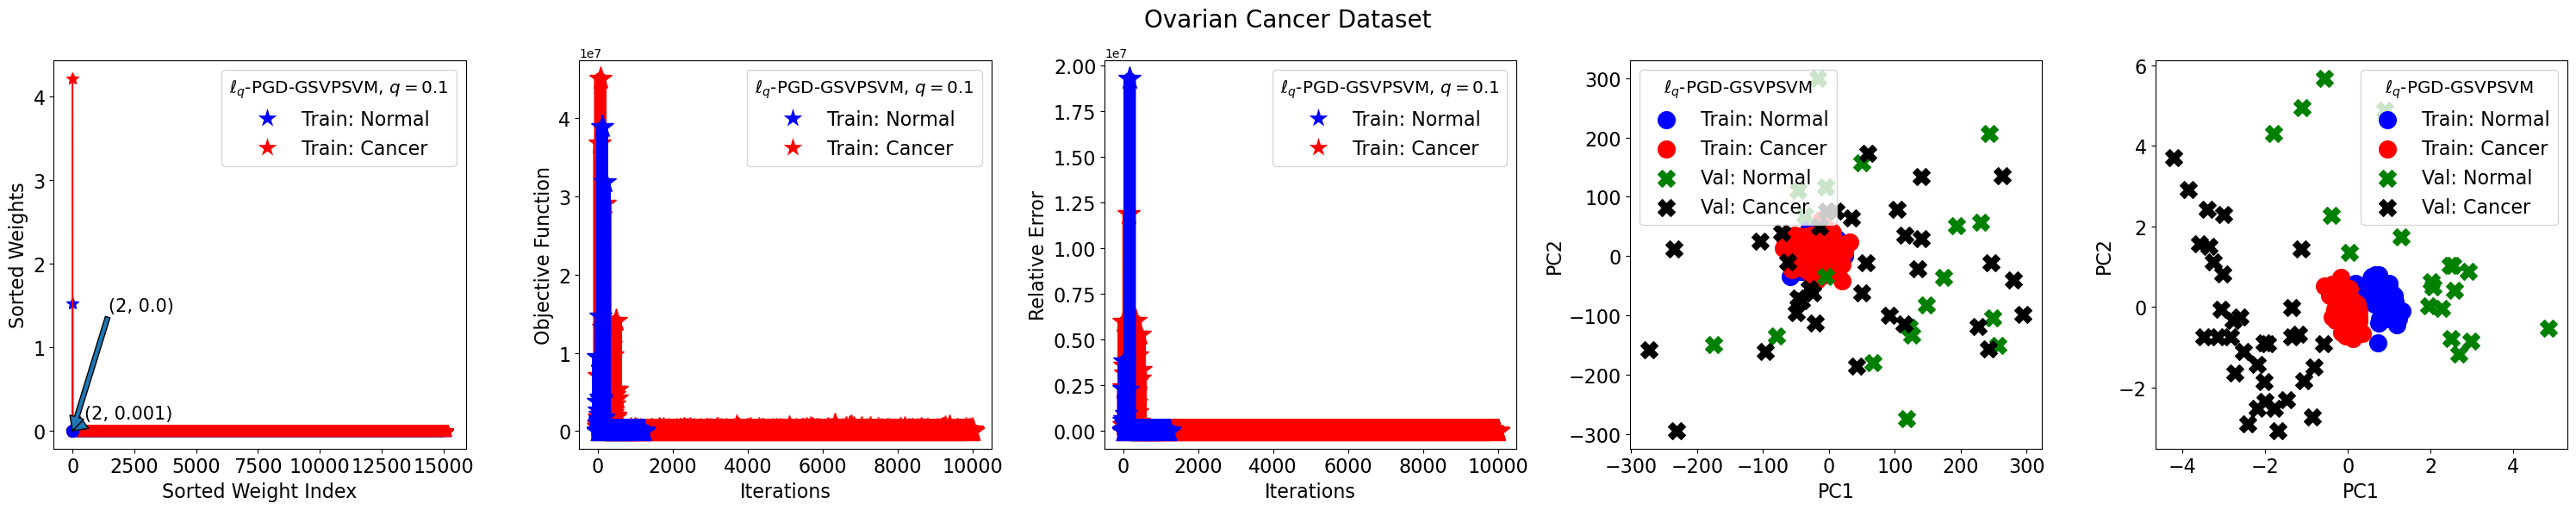

,Feature Index (Normal),Top Features (Normal),Feature Index (Cancer),Top Features (Cancer)
0,1679,MZ245.24466,1679,MZ245.24466
1,181,MZ2.8234234,1800,MZ281.88777


Test Results for q = 0.1
          Dataset  Bal. Acc.  Specificity  Recall  Precision  TN  FP  FN  TP
0  Ovarian Cancer   0.944444     0.888889     1.0     0.9375   8   1   0  15
Validation Results for q = 1
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0     94      18  Ovarian Cancer   0.955882          1.0  0.911765        1.0   

   TN  FP  FN  TP  
0  19   0   3  31  


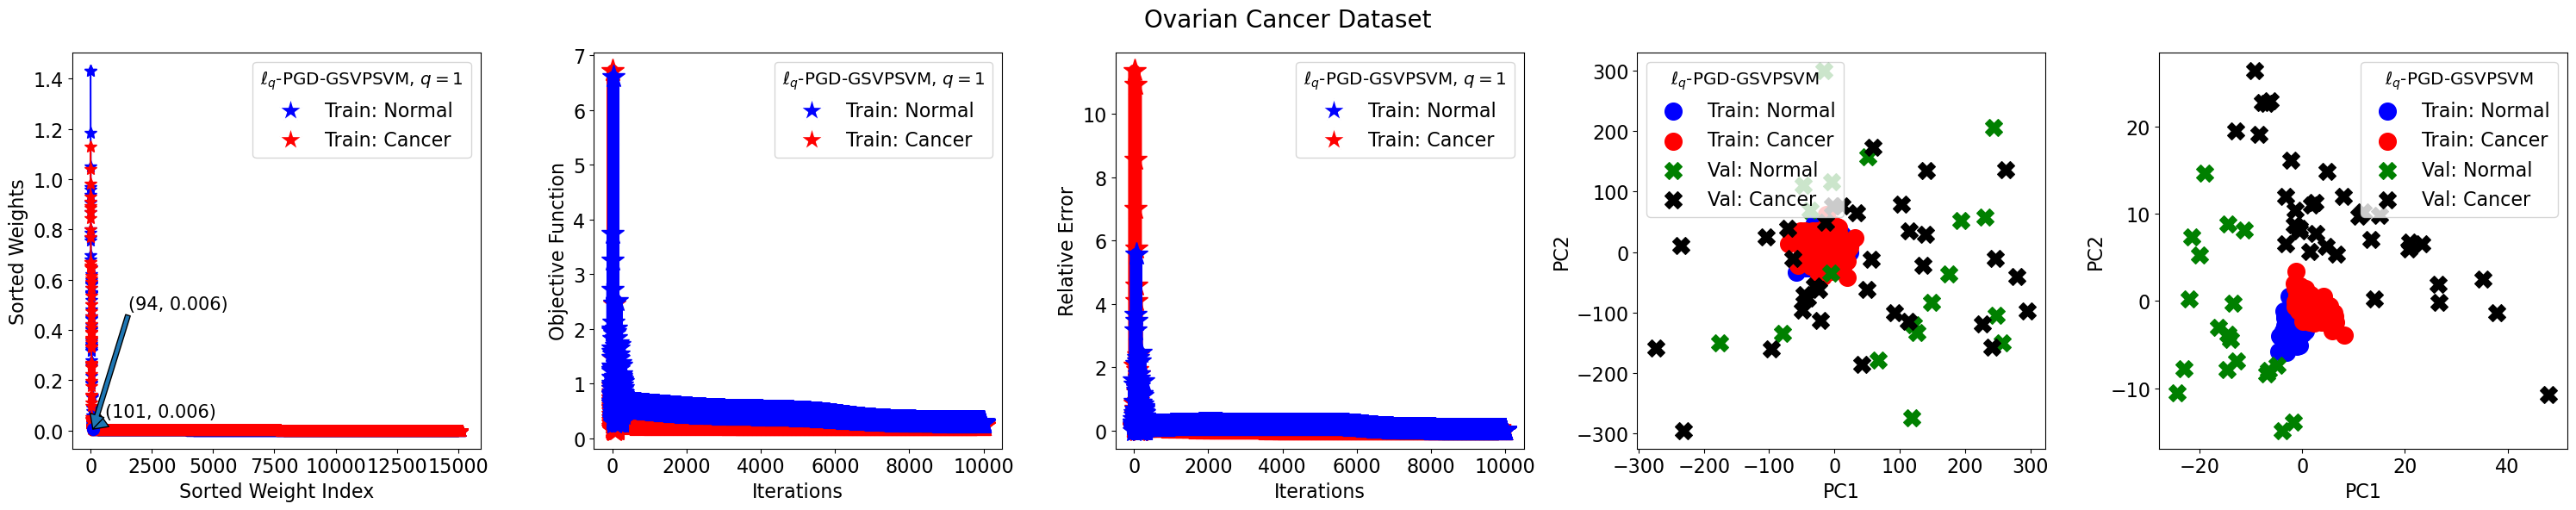

,Feature Index (Normal),Top Features (Normal),Feature Index (Cancer),Top Features (Cancer)
0,8273,MZ5959.5856,1678,MZ244.95245
1,8274,MZ5961.0266,1679,MZ245.24466
2,8275,MZ5962.4677,1680,MZ245.53704
3,2239,MZ436.24386,1677,MZ244.66041
4,2240,MZ436.63379,1681,MZ245.8296
5,8272,MZ5958.1448,2191,MZ417.73207
6,2236,MZ435.07512,1735,MZ261.88643
7,2237,MZ435.46452,1682,MZ246.12233
8,2238,MZ435.85411,1683,MZ246.41524
9,6381,MZ3545.177,1736,MZ262.18857


Test Results for q = 1
          Dataset  Bal. Acc.  Specificity    Recall  Precision  TN  FP  FN  TP
0  Ovarian Cancer   0.933333          1.0  0.866667        1.0   9   0   2  13


In [3]:
lambd = [(0.06, 0.06),(0.003,0.003)] 
step_size = [0.3162277660168379]
datum = ['Ovarian Cancer Dataset']
datum_list = ['Ovarian']
listing = [{'x':'Normal','y':'Cancer'}]
epsa = [10**(-3),10**(-3)]
q = [0.1,1]
for k in range(len(q)):
    for i in range(len(datum)):
        print(f'Validation Results for q = {q[k]}')
        runs_list, _, _ = classification(datum[i], '$\ell_q$-PGD-GSVPSVM', 'truncate', 'lq1', lambd[k], 42, step_size[i],'pca', **{'q': q[k], 'epsa': epsa[k]})
        try:
            top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
        except FileNotFoundError:
            continue
    print(f'Test Results for q = {q[k]}')
    datra = ['Ovarian Cancer']
    test_model(datum, datum_list, datra)

Finally, we examine the solution method, i.e., $\ell_1$-PGD-GSVPSVM, associated with $\ell_1$ norm. This method is $\epsilon$-free, and will be applied it to the datasets above.   

condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      4       1  Breast Cancer   0.986842          1.0  0.973684        1.0   

   TN  FP  FN  TP  
0  64   0   1  37  


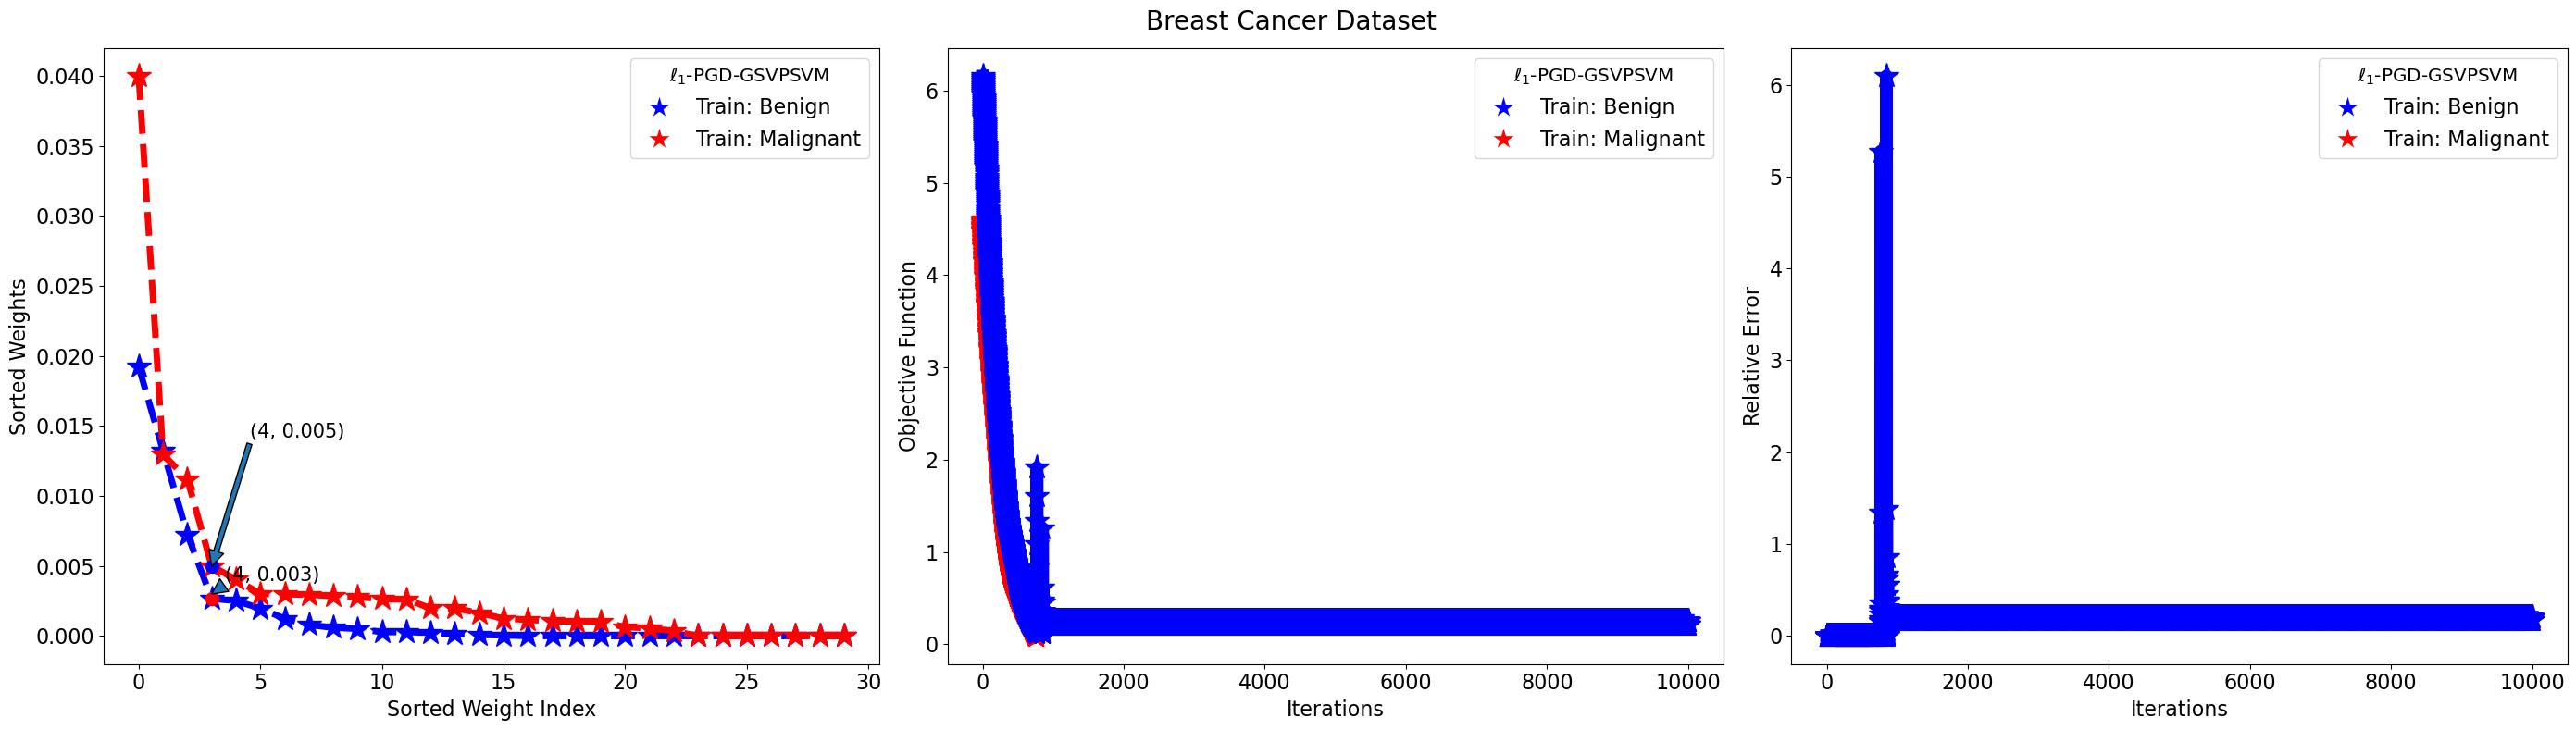

,Feature Index (Normal),Top Features (Normal),Feature Index (Cancer),Top Features (Cancer)
0,12,perimeter_se,27,concave points_worst
1,7,concave points_mean,21,texture_worst
2,17,concave points_se,9,fractal_dimension_mean
3,23,area_worst,17,concave points_se


   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0     42       7  Ovarian Cancer   0.970588          1.0  0.941176        1.0   

   TN  FP  FN  TP  
0  19   0   2  32  


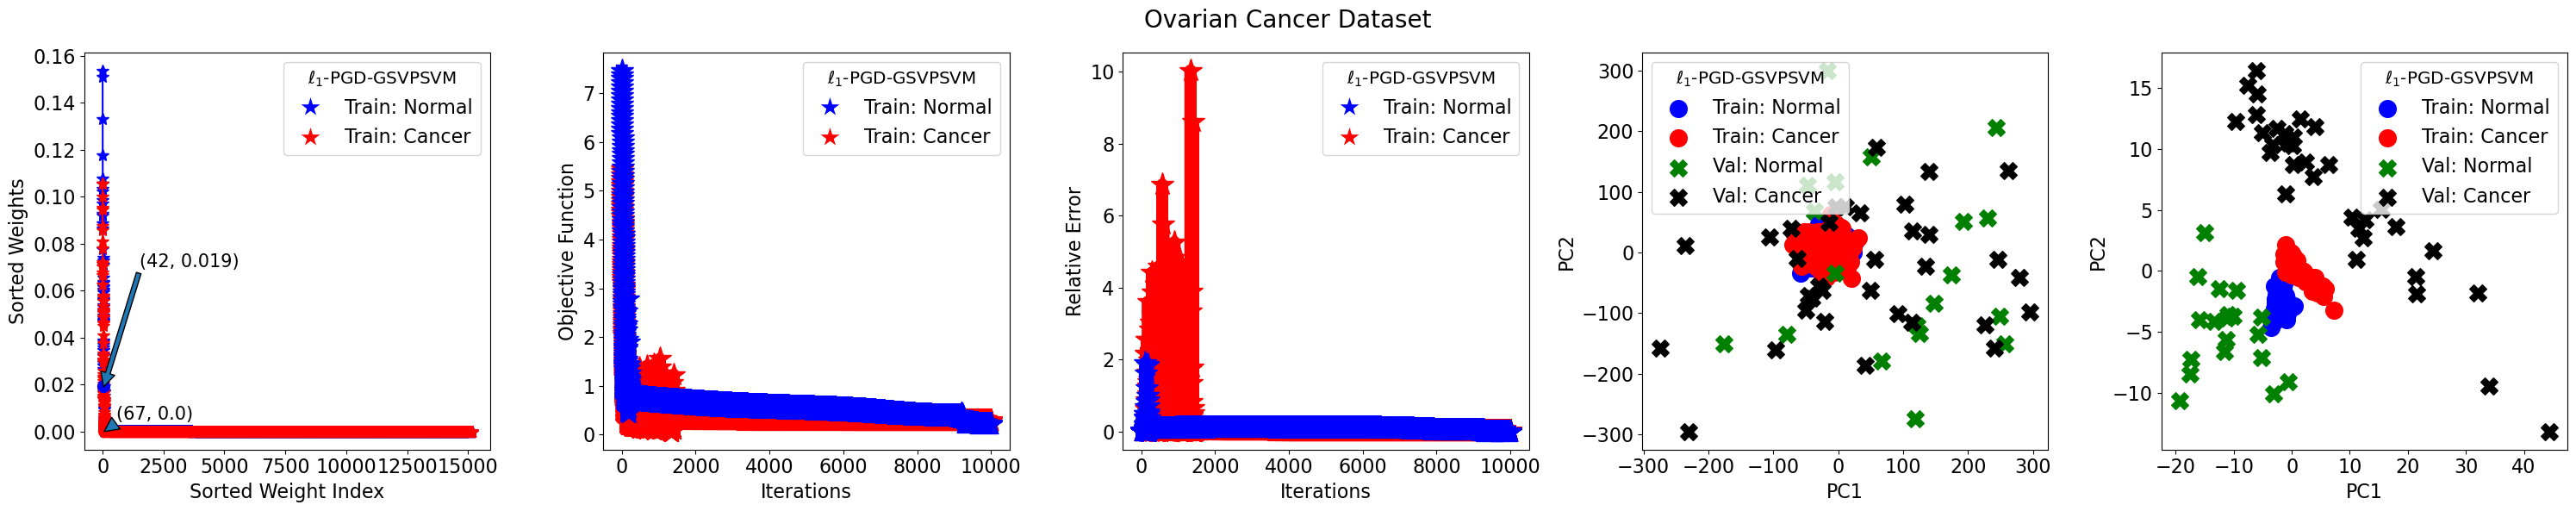

,Feature Index (Normal),Top Features (Normal),Feature Index (Cancer),Top Features (Cancer)
0,8274,MZ5961.0266,2527,MZ555.74254
1,8273,MZ5959.5856,1678,MZ244.95245
2,8275,MZ5962.4677,1679,MZ245.24466
3,2239,MZ436.24386,2528,MZ556.18264
4,2236,MZ435.07512,1680,MZ245.53704
5,2240,MZ436.63379,2526,MZ555.30262
6,2237,MZ435.46452,1681,MZ245.8296
7,6381,MZ3545.177,1677,MZ244.66041
8,2238,MZ435.85411,1682,MZ246.12233
9,8272,MZ5958.1448,1683,MZ246.41524


          Dataset  Bal. Acc.  Specificity    Recall  Precision  TN  FP  FN  TP
0   Breast Cancer   0.961538          1.0  0.923077        1.0  44   0   2  24
1  Ovarian Cancer   0.966667          1.0  0.933333        1.0   9   0   1  14


In [4]:
lambd = [(0.8684252631578948, 0.8685052631578948), (0.047377894736842105, 0.047557894736842105)]
step_size = [0.001, 0.004]
datum = ['Breast Cancer Dataset', 'Ovarian Cancer Dataset']
datum_list = ['breast_cancer', 'Ovarian']
listing = [{'x':'Normal','y':'Cancer'},{'x':'Normal','y':'Cancer'}]

pcs = ['npca','pca']
for i in range(len(datum)):
    runs_list, _, _ = classification(datum[i], '$\ell_1$-PGD-GSVPSVM', 'truncate', 'l1', lambd[i], 42, step_size[i],pcs[i])
    try:
        top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
    except FileNotFoundError:
        continue

datra = ['Breast Cancer', 'Ovarian Cancer']
test_model(datum, datum_list, datra)

Modify for parameter selection

In [ ]:
lambd = list(zip(np.linspace(0.000001,0.5,20),np.linspace(0.00002,0.5,20)))
step_size = [10**(-2.5),1e-3,10**(-3.5),1e-1,10**(-1.5),1e-2]
datum = ['Ovarian Cancer Dataset']
datra= ['Ovarian Cancer']
datum_list = ['Ovarian']
listing = [{'x':'Normal','y':'Cancer'}]
var = ['truncate']
for j in range(len(var)):
    print(var[j])
    for i in range(len(datum)):
            for k in range(len(lambd)):
                print('lambd :=', lambd[k])
                for kk in range(len(step_size)):
                    print('step size :=', step_size[kk])
                    runs_list, _, _ = classification(datum[i], f'$\ell_q$-PGD-GSVPSVM', var[j], 'l1', lambd[k], 42, step_size[kk], 'npca',**{'q': 0.1, 'epsa': 10**(-1)})
                    try:
                        top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
                    except FileNotFoundError:
                        continue